# 1. 2021-06 제주대학교 파이썬을 활용한 머신러닝 응용

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/SDSTony/2021-JNU-ML-lab-session/blob/main/notebook.ipynb)


강사: 안성진 <img src="https://github.com/kaggler-tv/dku-kaggle-class/blob/master/course-website/imgs/Sungjin.png?raw=true" width="5%" height="7%">

## 1.1 데이터과학 대회 소개

- 데이터과학 대회: **주어진 기간** 동안 모델의 성능을 **경쟁적으로** 높이는 **배움의 장**
    - `주어진 기간`: 대회 기간
        - 종료된 대회 참여시 기한 없음
    - `경쟁적으로`: 참가자들과 공개 리더보드를 통한 경쟁
        - 나의 현재 위치를 확인하며 지속적인 동기부여와 성취감
    - `배움의 장`: 다양한 데이터에 여러 머신러닝 기법을 적용해보면서 배우는 PBL(Project Based Learning)

- 참가 이유

    - 재미, 배움, **경력 개발**을 실현할 수 있는 기회
    ![image.png](https://drive.google.com/uc?id=1DdVFF_PXr3fAcCsZgiS6LK7TgDWM8ZFB) 
        - 대회 출전자/수상자 우대 예시 1

    ![image.png](https://drive.google.com/uc?id=1tzGofJu2h7Hmd6VlaO4DCYPEH_fmDPZq)
        - 대회 출전자/수상자 우대 예시 2
    - 나의 가설이 맞았을 때 느끼는 카타르시스




## 1.2 머신러닝 파이프라인/실험과정 소개

- 데이터과학 대회(머신러닝 응용 프로젝트)를 위한 모델 구축 파이프라인은 아래와 같습니다. 

![image.png](https://drive.google.com/uc?id=1eoPn1YGwWs1wIHYKXsaVdzagbgSabH0y)

- 먼저 데이터를 불러옵니다. 
- 불러온 데이터에 대한 탐색을 진행합니다. 
- 간단한 베이스라인 모델을 구축합니다. 
- 최적의 모델 탐색 과정을 반복하여 모델의 성능을 고도화 합니다. 
- 최종 모델을 산출합니다. 

In [ ]:
# 한글폰트 사용 in colab #출처: https://velog.io/@jonsyou/colabsetting1
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

1. 위 코드를 한번 실행 시킨다
2. 런타임 > 런타임 다시 시작 을 누른다.
3. 다시 한번 더 위 코드를 실행 시킨다. 

In [ ]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (0.24.2)


## 1.3 Pandas 탐색


In [ ]:
# 데이터 접근을 위해 구글 드라이브에 연결
# 데이터는 본인 구글 드라이브에 업로드
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd 

In [ ]:
# 데이터 불러오기
path = '/content/drive/MyDrive/04. 데이콘/09. 데이콘 제주대 2021/data'
train = pd.read_csv(path + '/train.csv')
# 실습
test = pd.read_csv(path + '/test.csv')
submission = pd.read_csv(path + '/sample_submission.csv')

#### pd.DataFrame.head()

In [ ]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [ ]:
train.tail()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
26452,26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,NaN,2.0,-47.0,2.0
26454,26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0
26455,26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,0,0,Laborers,1.0,-59.0,2.0
26456,26456,F,N,N,0,81000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19569,-1013,1,0,0,0,Security staff,2.0,-9.0,2.0


- 전처리 할 수 있는 것들
    - 문자열 컬럼
        - ordinal 인코딩
        - one-hot 인코딩
        - etc.
    - 음수로 입력된 컬럼
    - 결측값
        - 최빈값
        - 제거
        - etc.
- 여러 실험/가설들을 생각해볼 수 있음

In [ ]:
test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


In [ ]:
submission.head()

,index,0,1,2
0,26457,0,0,0
1,26458,0,0,0
2,26459,0,0,0
3,26460,0,0,0
4,26461,0,0,0


#### log loss

- 분류 모델 평가 시 사용
- 모델이 예측한 확률을 직접적으로 반영하여 계산

    - 예시) 3 곱하기 5는? (1점)

|        | 학생 A | 학생 B |
| ------ | ------ | ------ |
| (1) 15 |**0.99**   | **0.2**   |
| (2) 2  | 0      | 0.2    |
| (3) 8  | 0.01   | 0.2    |
| (4) 1  | 0      | 0.2    |
| (5) -2 | 0      | 0.2    |

- 학생 A, 학생 B 모두 1번을 선택했으나 학생 A는 확신에 찬 상태로 선택했으며 학생 B는 찍었음
- accuracy(정확도)로 평가를 하게 되면 맞춘 여부만 고려하기 때문에 두 학생 모두 1점을 획득
- 확률 값으로 점수를 매기면 학생 A는 0.99점, 학생 B는 0.2점을 획득
- log loss는 확률 값을 음의 로그 취한뒤 평균을 산출

![](https://miro.medium.com/max/1162/0*i2_eUc_t8A1EJObd.png)
- 출처: [medium](https://medium.com/usf-msds/choosing-the-right-metric-for-evaluating-machine-learning-models-part-2-86d5649a5428)

- **참고)** 모델 평가시에는 확률값 산출이 가능하지만, 현실 세계에서는 학생이 해당 답을 선택한 확률을 알기 어려움
- [log loss에 대해 알아보자 영상](https://www.youtube.com/watch?v=i5U2inxzXx4) 참고


#### pd.DataFrame.shape

In [ ]:
train.shape, test.shape, submission.shape

((26457, 20), (10000, 19), (10000, 4))

#### pd.DataFrame.info()

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

#### pd.DataFrame.select_dtypes(include=[ ])

- object: 문자열
- int64, float64: 정수, 실수

In [ ]:
train.select_dtypes(include=['object'])

,gender,car,reality,income_type,edu_type,family_type,house_type,occyp_type
0,F,N,N,Commercial associate,Higher education,Married,Municipal apartment,NaN
1,F,N,Y,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,Laborers
2,M,Y,Y,Working,Higher education,Married,House / apartment,Managers
3,F,N,Y,Commercial associate,Secondary / secondary special,Married,House / apartment,Sales staff
4,F,Y,Y,State servant,Higher education,Married,House / apartment,Managers
...,...,...,...,...,...,...,...,...
26452,F,N,N,State servant,Secondary / secondary special,Married,House / apartment,Core staff
26453,F,N,Y,Working,Higher education,Separated,House / apartment,NaN
26454,F,Y,N,Working,Secondary / secondary special,Civil marriage,With parents,Core staff
26455,M,N,Y,Working,Incomplete higher,Single / not married,House / apartment,Laborers


In [ ]:
train.select_dtypes(include=['int64', 'float64'])

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
0,0,0,202500.0,-13899,-4709,1,0,0,0,2.0,-6.0,1.0
1,1,1,247500.0,-11380,-1540,1,0,0,1,3.0,-5.0,1.0
2,2,0,450000.0,-19087,-4434,1,0,1,0,2.0,-22.0,2.0
3,3,0,202500.0,-15088,-2092,1,0,1,0,2.0,-37.0,0.0
4,4,0,157500.0,-15037,-2105,1,0,0,0,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,2,225000.0,-12079,-1984,1,0,0,0,4.0,-2.0,1.0
26453,26453,1,180000.0,-15291,-2475,1,0,0,0,2.0,-47.0,2.0
26454,26454,0,292500.0,-10082,-2015,1,0,0,0,2.0,-25.0,2.0
26455,26455,0,171000.0,-10145,-107,1,0,0,0,1.0,-59.0,2.0


#### pd.DataFrame.groupby()

In [ ]:
train[['occyp_type', 'credit']].groupby(['occyp_type']).mean().sort_values(by='credit')

,credit
occyp_type,
IT staff,1.365854
Waiters/barmen staff,1.435484
Private service staff,1.485597
Accountants,1.486696
Low-skill Laborers,1.488189
Secretaries,1.494845
Laborers,1.500443
Core staff,1.502646
High skill tech staff,1.503846


Q. edu_type 범주별 credit의 평균을 오름차순으로 나렬하시오.

#### pd.DataFrame.agg()

In [ ]:
train[['occyp_type', 'credit']].groupby(['occyp_type']).agg(['mean', 'count', 'min', 'max']).droplevel(level=0, axis=1)

,mean,count,min,max
occyp_type,,,,
Accountants,1.486696,902,0.0,2.0
Cleaning staff,1.570720,403,0.0,2.0
Cooking staff,1.505470,457,0.0,2.0
Core staff,1.502646,2646,0.0,2.0
Drivers,1.535238,1575,0.0,2.0
HR staff,1.709677,62,0.0,2.0
High skill tech staff,1.503846,1040,0.0,2.0
IT staff,1.365854,41,0.0,2.0
Laborers,1.500443,4512,0.0,2.0


#### pd.DataFrame.describe()

In [ ]:
train.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


#### pd.DataFrame.plot()

- pandas만 사용해서 기본적인 시각화 가능
- 인사이트를 도출하기 위해 사용

kind : str

- `line` : line plot (default)
- `bar` : vertical bar plot
- `barh` : horizontal bar plot
- `hist` : histogram
- `box` : boxplot
- `scatter` : scatter plot

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


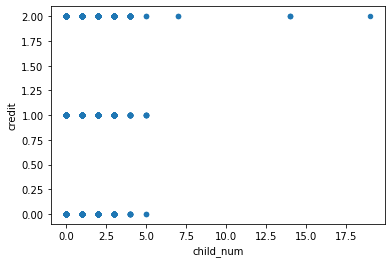

In [ ]:
train.plot(x='child_num', y='credit', kind='scatter')

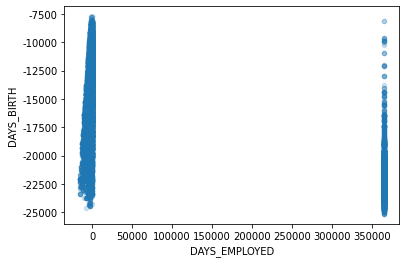

In [ ]:
train.plot(x='DAYS_EMPLOYED', y='DAYS_BIRTH', kind='scatter', alpha=0.2)

- 데이터 탐색 과정에서 데이터에 대한 이해도 증가
    - 위 예시에서는 이상치 발견

- 도메인 지식이 없을 때는 모든 컬럼을 하나씩 탐색 하면서 인사이트 도출, 이상치 탐지, 실험 아이디어 기록을 하게 되서, 일반적으로 가장 많이 시간 투자하는 단계

- 도메인 지식을 알고 있으면 효율적인 탐색 시작 위치를 알고 있기 때문에 탐색 시간이 줄어들 수 있음

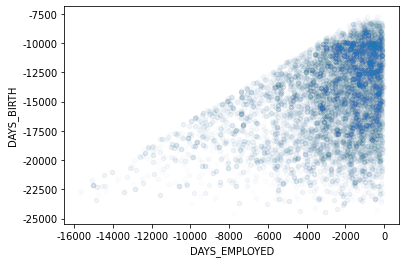

In [ ]:
train[train['DAYS_EMPLOYED'] < 0].plot(x='DAYS_EMPLOYED', y='DAYS_BIRTH', kind='scatter', alpha=0.01)

In [ ]:
train['DAYS_EMPLOYED'].describe()

count     26457.000000
mean      59068.750728
std      137475.427503
min      -15713.000000
25%       -3153.000000
50%       -1539.000000
75%        -407.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [ ]:
train[train['DAYS_EMPLOYED'] > 0]['DAYS_EMPLOYED'].unique()

array([365243])

#### 튜토리얼 보면서, 본인 데이터에 적용해보기

- 일반적으로 시각화를 할 때 다양한 기능을 외우는 것도 좋지만, 공식 문서를 함께 참조하여 사용합니다. 
- 시각화를 할 때 다양한 공개 문서를 참조하여 본인 데이터에 적용하는 방법을 실습해보겠습니다. 
- 함수가 입력받는 데이터 형태를 확인
- [공개된 코드 예시](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)


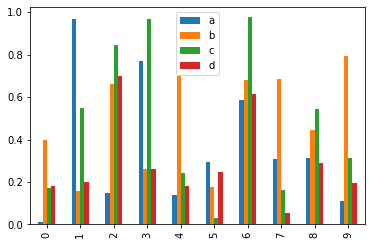

In [ ]:
import numpy as np 

df2 = pd.DataFrame(np.random.rand(10, 4), columns=["a", "b", "c", "d"])
df2.plot.bar()

In [ ]:
df2

,a,b,c,d
0,0.011363,0.396726,0.170003,0.179738
1,0.967231,0.157369,0.550494,0.202137
2,0.149835,0.660468,0.847518,0.697145
3,0.769397,0.262603,0.969987,0.261446
4,0.136994,0.700843,0.243301,0.178816
5,0.294804,0.175531,0.032480,0.247788
6,0.587003,0.680426,0.975661,0.612805
7,0.307307,0.686034,0.163206,0.054735
8,0.312079,0.443038,0.543804,0.288468
9,0.112030,0.792726,0.314542,0.193948


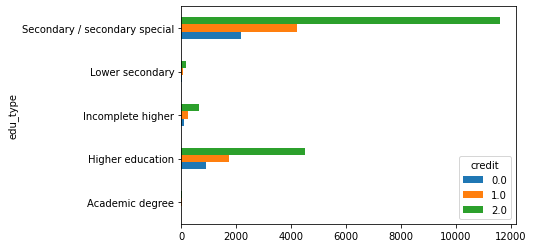

In [ ]:
train[['edu_type', 'credit']].value_counts().reset_index().pivot(index='edu_type', columns='credit', values=0).plot.barh()

참고자료

- [Pandas 10분 완성](https://dataitgirls2.github.io/10minutes2pandas/)
    - [데잇걸즈](https://dataitgirls3.github.io/) 단체에서 번역한 pandas 튜토리얼
- [Pandas 공식 튜토리얼](https://pandas.pydata.org/docs/user_guide/cookbook.html#cookbook)
    - Pandas 공식 홈페이지에서 제공하는 문서

- [Pandas 공식 시각화 튜토리얼](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

## 1.4 Matplotlib, Seaborn 탐색

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


[샘플 코드](https://www.python-graph-gallery.com/basic-barplot-with-seaborn) 확인 후 `occyp_type`별 `credit`의 평균을 막대그리프로 시각화 해보기

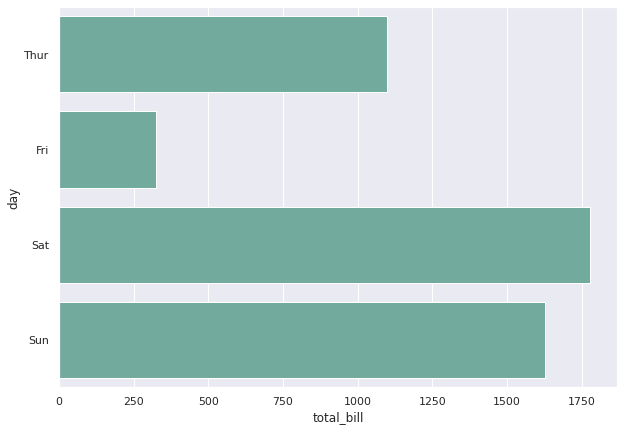

In [ ]:
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# load dataset
tips = sns.load_dataset("tips")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x="total_bill", 
    y="day", 
    data=tips, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2')

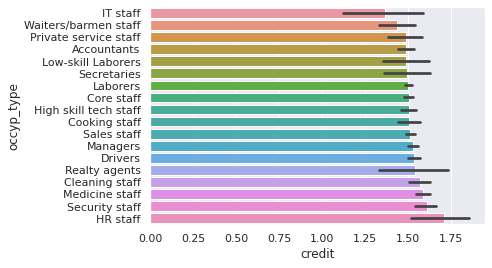

참고자료

- [Matplotlib.pyplot 기본 튜토리얼, 스타일, 캔버스](https://teddylee777.github.io/visualization/matplotlib-tutorial)
- [Matplotlib을 활용한 데이터 시각화 그래프 예제](https://teddylee777.github.io/visualization/matplotlib-tutorial-2)
- [Seaborn의 통계 차트 및 데이터 시각화 예제](https://teddylee777.github.io/visualization/seaborn-tutorial-1)
- [Python Graph Gallery](https://www.python-graph-gallery.com/)

## 1.5 베이스라인 모델 구축

- 베이스라인으로 로지스틱회귀 모델을 사용해보겠습니다. 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model

LogisticRegression()

## 1.6 모델 검증 방법

![image.png](https://drive.google.com/uc?id=1zZpBaXpYszxISryqKWY_ECt13tDWumUE)

- K Fold 교차검증 (Cross-Valdation)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss
import numpy as np

In [ ]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [ ]:
# numeric column만 추출 
num_features = ['income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'family_size', 'begin_month']
trn = train[num_features].values
y = train['credit'].values
tst = test[num_features].values

In [ ]:
trn

array([[ 2.0250e+05, -1.3899e+04, -4.7090e+03, ...,  0.0000e+00,
         2.0000e+00, -6.0000e+00],
       [ 2.4750e+05, -1.1380e+04, -1.5400e+03, ...,  1.0000e+00,
         3.0000e+00, -5.0000e+00],
       [ 4.5000e+05, -1.9087e+04, -4.4340e+03, ...,  0.0000e+00,
         2.0000e+00, -2.2000e+01],
       ...,
       [ 2.9250e+05, -1.0082e+04, -2.0150e+03, ...,  0.0000e+00,
         2.0000e+00, -2.5000e+01],
       [ 1.7100e+05, -1.0145e+04, -1.0700e+02, ...,  0.0000e+00,
         1.0000e+00, -5.9000e+01],
       [ 8.1000e+04, -1.9569e+04, -1.0130e+03, ...,  0.0000e+00,
         2.0000e+00, -9.0000e+00]])

In [ ]:
trn.shape, y.shape, tst.shape

((26457, 9), (26457,), (10000, 9))

In [ ]:
n_fold = 5
seed = 42
cv = KFold(n_splits=n_fold, shuffle=True, random_state=seed)

In [ ]:
cv

KFold(n_splits=5, random_state=42, shuffle=True)

In [ ]:
# 입력 값의 형태 파악이 중요
result_val = np.zeros((trn.shape[0], 3)) # 600 X 3 행렬 생성
result_tst = np.zeros((tst.shape[0], 3))

for i, (i_trn, i_val) in enumerate(cv.split(trn)):
    print(f'training model for CV #{i}')
    model = LogisticRegression()
    model.fit(trn[i_trn], y[i_trn])
    result_val[i_val, :] = model.predict_proba(trn[i_val])
    result_tst += model.predict_proba(tst) / n_fold

training model for CV #0
training model for CV #1
training model for CV #2
training model for CV #3
training model for CV #4


In [ ]:
log_loss(y, np.zeros((trn.shape[0], 3)))

1.0986122886681096

In [ ]:
log_loss(y, result_val)

0.8779836220054456

In [ ]:
result_val.shape

(26457, 3)

In [ ]:
np.savetxt('logistic_cv.txt', result_val, fmt='%.6f', delimiter=',')
np.savetxt('logistic_tst.txt', result_tst, fmt='%.6f', delimiter=',')

참고자료

- [모델 성능 평가 지표 (회귀 모델, 분류 모델)](https://rk1993.tistory.com/entry/%EB%AA%A8%EB%8D%B8-%EC%84%B1%EB%8A%A5-%ED%8F%89%EA%B0%80-%EC%A7%80%ED%91%9C-%ED%9A%8C%EA%B7%80-%EB%AA%A8%EB%8D%B8-%EB%B6%84%EB%A5%98-%EB%AA%A8%EB%8D%B8)
- [Cross-Validation, Stacking](https://kaggler-tv.github.io/dku-kaggle-class/lectures/08-cv-stacking.html)

## 1.7 범주형 데이터 전처리 방법

### 1.7.1 ordinal/label 인코딩

![](https://miro.medium.com/max/700/1*kPKvp4c462GB1NS8UotXYQ.png)

- 출처: [medium](https://towardsdatascience.com/categorical-encoding-techniques-93ebd18e1f24)

In [ ]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
train_cat = train.copy()
oe = OrdinalEncoder()
# categorical columns
cat_cols = ['income_type', 'edu_type', 'family_type', 'house_type']
train_cat[cat_cols] = oe.fit_transform(train_cat[cat_cols])
train_cat[cat_cols].head()

,income_type,edu_type,family_type,house_type
0,0.0,1.0,1.0,2.0
1,0.0,4.0,0.0,1.0
2,4.0,1.0,1.0,1.0
3,0.0,4.0,1.0,1.0
4,2.0,1.0,1.0,1.0


In [ ]:
test_cat = test.copy()
test_cat[cat_cols] = oe.transform(test_cat[cat_cols])
test_cat[cat_cols]

,income_type,edu_type,family_type,house_type
0,1.0,4.0,0.0,1.0
1,2.0,1.0,1.0,1.0
2,4.0,4.0,1.0,1.0
3,0.0,4.0,1.0,1.0
4,2.0,1.0,1.0,1.0
...,...,...,...,...
9995,4.0,2.0,1.0,1.0
9996,4.0,4.0,0.0,1.0
9997,4.0,4.0,1.0,1.0
9998,0.0,4.0,1.0,1.0


In [ ]:
features = num_features + cat_cols
trn = train_cat[features].values
y = train_cat['credit'].values
tst = test_cat[features].values

In [ ]:
n_fold = 5
seed = 42
cv = KFold(n_splits=n_fold, shuffle=True, random_state=seed)

In [ ]:
result_val = np.zeros((trn.shape[0], 3))
result_tst = np.zeros((tst.shape[0], 3))

for i, (i_trn, i_val) in enumerate(cv.split(trn)):
    print(f'training model for CV #{i}')
    model = LogisticRegression()
    model.fit(trn[i_trn], y[i_trn])
    result_val[i_val, :] = model.predict_proba(trn[i_val])
    result_tst += model.predict_proba(tst) / n_fold

training model for CV #0
training model for CV #1
training model for CV #2
training model for CV #3
training model for CV #4


In [ ]:
log_loss(y, result_val)

0.8779763981371089

### 1.7.2 one-hot 인코딩


![](https://miro.medium.com/max/2120/1*hZLqbZqqrwiqkGxxl2vYkg.png)

- 출처: [medium](https://towardsdatascience.com/categorical-encoding-techniques-93ebd18e1f24)

In [ ]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
cat_cols = ['income_type', 'edu_type', 'family_type', 'house_type']
ohe_features = ohe.fit_transform(train[cat_cols]).toarray()

In [ ]:
for col in cat_cols:
    print(len(train[col].unique()))

5
5
5
6


In [ ]:
ohe_features.shape

(26457, 21)

In [ ]:
train_ohe_cat = np.concatenate([train[num_features].values, ohe_features], axis=1)

In [ ]:
len(num_features)

9

In [ ]:
train_ohe_cat.shape

(26457, 30)

In [ ]:
test_ohe_features = ohe.transform(test[cat_cols]).toarray()
test_ohe_cat = np.concatenate([test[num_features].values, test_ohe_features], axis=1)

In [ ]:
train_ohe_cat.shape, test_ohe_cat.shape

((26457, 30), (10000, 30))

- `train_cat`, `test_cat`: categorical 변수를 ordinal 인코딩 한 데이터
- `train_ohe_cat`, `test_ohe_cat`: categorical 변수를 one-hot 인코딩 한 데이터

In [ ]:
trn = train_ohe_cat
y = train['credit'].values
tst = test_ohe_cat

In [ ]:
n_fold = 5
seed = 42
cv = KFold(n_splits=n_fold, shuffle=True, random_state=seed)

In [ ]:
result_val = np.zeros((trn.shape[0], 3))
result_tst = np.zeros((tst.shape[0], 3))

for i, (i_trn, i_val) in enumerate(cv.split(trn)):
    print(f'training model for CV #{i}')
    model = LogisticRegression()
    model.fit(trn[i_trn], y[i_trn])
    result_val[i_val, :] = model.predict_proba(trn[i_val])
    result_tst += model.predict_proba(tst) / n_fold

training model for CV #0
training model for CV #1
training model for CV #2
training model for CV #3
training model for CV #4


In [ ]:
log_loss(y, result_val)

0.877982469218465

In [ ]:
result_val

array([[0.13248901, 0.24083157, 0.62667942],
       [0.15763864, 0.24751158, 0.59484978],
       [0.07870067, 0.16642403, 0.7548753 ],
       ...,
       [0.16507992, 0.25249495, 0.58242513],
       [0.17720615, 0.27137598, 0.55141787],
       [0.09395693, 0.21957747, 0.6864656 ]])

## 1.8 알고리즘 변경을 통한 모델 고도화

### 1.8.1 결정트리

![](https://github.com/kaggler-tv/dku-kaggle-class/blob/master/course-website/imgs/ch06-img15.jpg?raw=true)

- 출처: [dku-kaggle-class](https://kaggler-tv.github.io/dku-kaggle-class/lectures/06-scikit-learn.html#id2)

- [시각화로 보는 결정트리](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

## ordinal 인코딩
features = num_features + cat_cols
trn = train_cat[features].values
y = train['credit'].values
tst = test_cat[features].values

n_fold = 5
seed = 42
cv = KFold(n_splits=n_fold, shuffle=True, random_state=seed)

result_val = np.zeros((trn.shape[0], 3))
result_tst = np.zeros((tst.shape[0], 3))

for i, (i_trn, i_val) in enumerate(cv.split(trn)):
    print(f'training model for CV #{i}')
    ###
    model = DecisionTreeClassifier(random_state=seed, min_samples_split=1000)
    ###
    model.fit(trn[i_trn], y[i_trn])
    result_val[i_val, :] = model.predict_proba(trn[i_val])
    result_tst += model.predict_proba(tst) / n_fold

training model for CV #0
training model for CV #1
training model for CV #2
training model for CV #3
training model for CV #4


In [ ]:
?DecisionTreeClassifier

In [ ]:
result_val

array([[0.18766067, 0.20308483, 0.6092545 ],
       [0.12845528, 0.29593496, 0.57560976],
       [0.09202454, 0.13292434, 0.77505112],
       ...,
       [0.10416667, 0.246875  , 0.64895833],
       [0.06827309, 0.18473896, 0.74698795],
       [0.14776632, 0.19014891, 0.66208477]])

In [ ]:
log_loss(y, result_val)

0.8323119000925706

### 1.8.2 랜덤포레스트

![](https://github.com/kaggler-tv/dku-kaggle-class/blob/master/course-website/imgs/ch07-img03.jpg?raw=true)

- 출처: [dku-kaggle-class](https://kaggler-tv.github.io/dku-kaggle-class/lectures/06-scikit-learn.html#id2)

주요 하이퍼파라미터

- n_estimators: 의사결정 나무의 개수
- max_depth: 최대 깊이
- min_samples_split: 가지를 나눌 때 필요한 최소 샘플 개수
- min_samples_leaf: 가지를 나눈 후 왼쪽, 오른쪽 노드 각각에 존재해야 하는 최소 샘플 개수 
- max_features: 사용할 피쳐 개수


In [ ]:
?RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

## ordinal 인코딩
trn = train_cat[features].values
y = train['credit'].values
tst = test_cat[features].values

n_fold = 5
seed = 42
cv = KFold(n_splits=n_fold, shuffle=True, random_state=seed)

result_val = np.zeros((trn.shape[0], 3))
result_tst = np.zeros((tst.shape[0], 3))

for i, (i_trn, i_val) in enumerate(cv.split(trn)):
    print(f'training model for CV #{i}')
    ###
    model = RandomForestClassifier(random_state=seed, n_jobs=-1, min_samples_split=30)
    ###
    model.fit(trn[i_trn], y[i_trn])
    result_val[i_val, :] = model.predict_proba(trn[i_val])
    result_tst += model.predict_proba(tst) / n_fold

training model for CV #0
training model for CV #1
training model for CV #2
training model for CV #3
training model for CV #4


In [ ]:
result_val

array([[0.1624954 , 0.14847735, 0.68902725],
       [0.25759554, 0.17912168, 0.56328278],
       [0.13591916, 0.15966468, 0.70441615],
       ...,
       [0.1925775 , 0.24123466, 0.56618784],
       [0.12622696, 0.19619103, 0.67758202],
       [0.12349422, 0.14199797, 0.73450781]])

In [ ]:
log_loss(y, result_val)

0.7430723773945486

In [ ]:
from sklearn.preprocessing import OneHotEncoder

### one hot 인코딩
trn = train_ohe_cat
y = train['credit'].values
tst = test_ohe_cat

n_fold = 5
seed = 42
cv = KFold(n_splits=n_fold, shuffle=True, random_state=seed)

result_val = np.zeros((trn.shape[0], 3))
result_tst = np.zeros((tst.shape[0], 3))

for i, (i_trn, i_val) in enumerate(cv.split(trn)):
    print(f'training model for CV #{i}')
    model = RandomForestClassifier(random_state=seed, n_jobs=-1, min_samples_split=30)
    model.fit(trn[i_trn], y[i_trn])
    result_val[i_val, :] = model.predict_proba(trn[i_val])
    result_tst += model.predict_proba(tst) / n_fold

print(log_loss(y, result_val))

training model for CV #0
training model for CV #1
training model for CV #2
training model for CV #3
training model for CV #4
0.745201916927706


In [ ]:
from sklearn.preprocessing import label_binarize

label_binarize(y, classes=[0,1,2])

array([[0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [ ]:
np.savetxt('rf_cv.txt', result_val, fmt='%.6f', delimiter=',')
np.savetxt('rf_tst.txt', result_tst, fmt='%.6f', delimiter=',')

### 1.8.3 lightGBM

![](https://github.com/kaggler-tv/dku-kaggle-class/blob/master/course-website/imgs/ch07-img07.jpg?raw=true)

- 출처: [dku-kaggle-class](https://kaggler-tv.github.io/dku-kaggle-class/lectures/06-scikit-learn.html#id2)

In [ ]:
?lgb.LGBMClassifier

In [ ]:
import lightgbm as lgb

## ordinal 인코딩
trn = train_cat[features].values
y = train['credit'].values
tst = test_cat[features].values

n_fold = 5
seed = 42
cv = KFold(n_splits=n_fold, shuffle=True, random_state=seed)

result_val = np.zeros((trn.shape[0], 3))
result_tst = np.zeros((tst.shape[0], 3))

for i, (i_trn, i_val) in enumerate(cv.split(trn)):
    print(f'training model for CV #{i}')
    model = lgb.LGBMClassifier(n_estimators=150,
                         num_leaves=50,
                         learning_rate=0.01,
                         min_child_samples=50,
                         random_state=seed,
                         n_jobs=-1)
    model.fit(trn[i_trn], y[i_trn], 
              eval_set=[(trn[i_val], y[i_val])], 
              early_stopping_rounds=10,
              verbose=10)
    result_val[i_val, :] = model.predict_proba(trn[i_val])
    result_tst += model.predict_proba(tst) / n_fold

print(log_loss(y, result_val))

In [ ]:
?lgb.LGBMClassifier

## 1.9 파이프라인 구축

- https://stackoverflow.com/questions/28178763/sklearn-use-pipeline-in-a-randomizedsearchcv

Pipeline: '명칭'과 '모델' 쌍을 같이 입력  

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
column_trans = ColumnTransformer(
     [('category', OrdinalEncoder(), cat_cols)],
     remainder='passthrough')

In [ ]:
train.select_dtypes(['int', 'float']).columns

Index(['index', 'child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'family_size',
       'begin_month', 'credit'],
      dtype='object')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [ ]:
num_features

['income_total',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'work_phone',
 'phone',
 'email',
 'family_size',
 'begin_month']

In [ ]:
pipe = Pipeline([('col_trans', column_trans), ('dt', DecisionTreeClassifier(random_state=seed, min_samples_split=1000))]) # , 

In [ ]:
features

['income_total',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'work_phone',
 'phone',
 'email',
 'family_size',
 'begin_month',
 'income_type',
 'edu_type',
 'family_type',
 'house_type']

In [ ]:
from sklearn.tree import DecisionTreeClassifier

## ordinal 인코딩
features = num_features + cat_cols
trn = train[features]
y = train['credit'].values
tst = test[features]

n_fold = 5
seed = 42
cv = KFold(n_splits=n_fold, shuffle=True, random_state=seed)

result_val = np.zeros((trn.shape[0], 3))
result_tst = np.zeros((tst.shape[0], 3))

for i, (i_trn, i_val) in enumerate(cv.split(trn)):
    print(f'training model for CV #{i}')
    ###
    model = pipe
    ###
    model.fit(trn.loc[i_trn], y[i_trn])
    result_val[i_val, :] = model.predict_proba(trn.loc[i_val])
    result_tst += model.predict_proba(tst) / n_fold

training model for CV #0
training model for CV #1
training model for CV #2
training model for CV #3
training model for CV #4


In [ ]:
from sklearn import set_config
set_config(display='diagram')   
# diplays HTML representation in a jupyter context
pipe

Pipeline(steps=[('col_trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('category', OrdinalEncoder(),
                                                  ['income_type', 'edu_type',
                                                   'family_type',
                                                   'house_type'])])),
                ('dt',
                 DecisionTreeClassifier(min_samples_split=1000,
                                        random_state=42))])

In [ ]:
log_loss(y, result_val)

0.8323119000925706

참고자료

- [Column Transformer with Mixed Types](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html)
- [Pipelines and composite estimators](https://scikit-learn.org/stable/modules/compose.html)


## 1.10 하이퍼파라미터 최적화

![그리드서치](https://trello-attachments.s3.amazonaws.com/5e0d387cd4f8ba5e8f790d8b/5e634450ee4a88284a40a05a/3e9490f6010aa32e74bfde07398ac603/image.png)

![](https://i.stack.imgur.com/cIDuR.png)

- 출처: [stack exchange](https://stats.stackexchange.com/questions/160479/practical-hyperparameter-optimization-random-vs-grid-search)

### 1.10.1 Grid Search

아래 범위로 탐색해보기

- `num_leaves`: [31]
- `min_child_samples`: [25, 100]
- `learning_rate`: [0.01, 0.003]
- `early_stopping_rounds`: [10]



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

### num leaves 후보군  개수 * min_child_samples 후보군 개수 * learning_rate 후보군 개수

param_grid = {'num_leaves':[31],}
###

n_fold = 5
seed = 42
cv = KFold(n_splits=n_fold, shuffle=True, random_state=seed)

features = num_features + cat_cols
trn = train_cat[features].values
y = train['credit'].values
tst = test_cat[features].values

X_trn, X_val, y_trn, y_val = train_test_split(trn, y, test_size=.2, random_state=seed)

model = lgb.LGBMClassifier(random_state=seed, 
                          n_estimators=150, 
                          n_jobs=-1)

gs = GridSearchCV(estimator=model,
            param_grid=param_grid,
            scoring='neg_log_loss',
            cv=cv, 
            verbose=1)

gs.fit(X_trn, y_trn, eval_set=[(X_val, y_val)], verbose=50)

In [ ]:
X_trn, X_val, y_trn, y_val = train_test_split(trn, y, test_size=.2, random_state=seed)
X_trn.shape, y_trn.shape

((21165, 13), (21165,))

In [ ]:
gs.best_params_

{'early_stopping_rounds': 10,
 'learning_rate': 0.01,
 'min_child_samples': 25,
 'num_leaves': 31}

In [ ]:
gs.best_score_

-0.8087189644053374

In [ ]:
import lightgbm as lgb

## ordinal 인코딩
features = num_features + cat_cols
trn = train_cat[features].values
y = train['credit'].values
tst = test_cat[features].values

n_fold = 5
seed = 42
cv = KFold(n_splits=n_fold, shuffle=True, random_state=seed)

result_val = np.zeros((trn.shape[0], 3))
result_tst = np.zeros((tst.shape[0], 3))

for i, (i_trn, i_val) in enumerate(cv.split(trn)):
    print(f'training model for CV #{i}')
    ## ** 연산자 사용하기 
    model = lgb.LGBMClassifier(**gs.best_params_, n_jobs=-1, random_state=seed, n_estimators=150)
    model.fit(trn[i_trn], y[i_trn], 
              eval_set=[(trn[i_val], y[i_val])], 
              early_stopping_rounds=10,
              verbose=10)
    result_val[i_val, :] = model.predict_proba(trn[i_val])
    result_tst += model.predict_proba(tst) / n_fold

print(log_loss(y, result_val))

In [ ]:
model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               early_stopping_rounds=10, importance_type='split',
               learning_rate=0.01, max_depth=-1, min_child_samples=25,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=150,
               n_jobs=-1, num_leaves=31, objective=None, random_state=42,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [ ]:
gs.best_params_

{'early_stopping_rounds': 10,
 'learning_rate': 0.01,
 'min_child_samples': 25,
 'num_leaves': 31}

In [ ]:
np.savetxt('lgb_cv.txt', result_val, fmt='%.6f', delimiter=',')
np.savetxt('lgb_tst.txt', result_tst, fmt='%.6f', delimiter=',')

### 1.10.2 Random Search

In [ ]:
for i in range(10, 100, 10):
    print(i)

10
20
30
40
50
60
70
80
90


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

###
param_grid = {'num_leaves':range(18, 30, 5), 
              'min_child_samples':range(10, 100, 10),
              'learning_rate':[0.03, 0.01, 0.003],
              'early_stopping_rounds':[10]}
###

n_fold = 5
seed = 42
cv = KFold(n_splits=n_fold, shuffle=True, random_state=seed)

features = num_features + cat_cols
trn = train_cat[features].values
y = train['credit'].values
tst = test_cat[features].values

X_trn, X_val, y_trn, y_val = train_test_split(trn, y, test_size=.2, random_state=seed)

model = lgb.LGBMClassifier(random_state=seed, 
                          n_estimators=150, 
                          n_jobs=-1)

rs = RandomizedSearchCV(estimator=model,
            param_distributions=param_grid,
            n_iter=4,
            scoring='neg_log_loss',
            cv=cv, 
            verbose=1)

rs.fit(X_trn, y_trn, eval_set=[(X_val, y_val)], verbose=50)

In [ ]:
rs.best_params_

{'early_stopping_rounds': 10,
 'learning_rate': 0.03,
 'min_child_samples': 20,
 'num_leaves': 18}

In [ ]:
rs.best_score_

-0.7928320839685943

## 1.11 앙상블

linear regression, random forest, lightgbm 예측값을 평균내어 결합해보겠습니다. 

In [ ]:
lr_cv = np.loadtxt('logistic_cv.txt', delimiter=',')
rf_cv = np.loadtxt('rf_cv.txt', delimiter=',')
lgb_cv = np.loadtxt('lgb_cv.txt', delimiter=',')

lr_tst = np.loadtxt('logistic_tst.txt', delimiter=',')
rf_tst = np.loadtxt('rf_tst.txt', delimiter=',')
lgb_tst = np.loadtxt('lgb_tst.txt', delimiter=',')


In [ ]:
y_pred = (lr_cv + rf_cv + lgb_cv) / 3

In [ ]:
y_pred

array([[0.14163867, 0.179803  , 0.67855833],
       [0.203124  , 0.20686967, 0.59000667],
       [0.11025367, 0.156837  , 0.73290933],
       ...,
       [0.14474767, 0.24846867, 0.60678367],
       [0.134467  , 0.21837833, 0.64715467],
       [0.092626  , 0.18187867, 0.725495  ]])

In [ ]:
y.shape, y_pred.shape

((26457,), (26457, 3))

In [ ]:
log_loss(y, y_pred)

0.7943893138007067

In [ ]:
y_tst_pred = (lr_tst + rf_tst + lgb_tst) / 3

In [ ]:
y_tst_pred.shape

(10000, 3)

In [ ]:
submission.head()

,index,0,1,2
0,26457,0,0,0
1,26458,0,0,0
2,26459,0,0,0
3,26460,0,0,0
4,26461,0,0,0


In [ ]:
submission.iloc[:, 1:] = y_tst_pred

In [ ]:
submission.head()

,index,0,1,2
0,26457,0.094836,0.183996,0.721168
1,26458,0.123213,0.178404,0.698383
2,26459,0.109112,0.172679,0.718208
3,26460,0.107137,0.171431,0.721432
4,26461,0.115829,0.206099,0.678072


In [ ]:
submission.to_csv('submission.csv', index=False)

짧은 시간내 많은 개념들을 살펴보느라 혼란스러울 수도 있습니다. 개인 시간에 참고자료들을 활용해서 천천히 하나씩 개념을 복습하고 학습하시길 권장드립니다. 

하나씩 천천히 해내간다면 분명 좋은 결과가 있으리라 확신합니다. 감사합니다. 